In [2]:
import os 
import pandas as pd
import json
import re
#import seaborn
#import matplotlib 


세부 영역 고유값 확인

# Documents 파일

## Document.json 문서 영역 확인

In [61]:
with open("/home/data/documents.jsonl") as f:
    docs = [json.loads(line) for line in f]
d = pd.DataFrame(docs)
dl = d['src'].unique()
len(dl)

for i in range(63):
    i=i
    dl[i] = dl[i].replace("ko_mmlu__", "")
    dl[i] = dl[i].replace("__test", "")
    dl[i] = dl[i].replace("__train", "")
    dl[i] = dl[i].replace("__validation", "")
dl = pd.DataFrame(dl)

du = dl[0].unique()

print(len(du), "가지 세부영역\n")
print(du)

21 가지 세부영역

['nutrition' 'conceptual_physics' 'ko_ai2_arc__ARC_Challenge'
 'human_sexuality' 'virology' 'human_aging' 'high_school_biology'
 'high_school_physics' 'college_biology' 'computer_security' 'anatomy'
 'college_physics' 'medical_genetics' 'electrical_engineering'
 'college_medicine' 'college_chemistry' 'astronomy'
 'college_computer_science' 'global_facts' 'high_school_chemistry'
 'high_school_computer_science']


In [ ]:
nutrition: 영양학
conceptual_physics: 개념 물리학
ko_ai2_arc__ARC_Challenge: ARC 챌린지 (AI2 한국어 ARC 챌린지)
human_sexuality: 인간 성
virology: 바이러스학
human_aging: 인간 노화
high_school_biology: 고등학교 생물학
high_school_physics: 고등학교 물리학
college_biology: 대학 생물학
computer_security: 컴퓨터 보안
anatomy: 해부학
college_physics: 대학 물리학
medical_genetics: 의학 유전학
electrical_engineering: 전기 공학
college_medicine: 대학 의학
college_chemistry: 대학 화학
astronomy: 천문학
college_computer_science: 대학 컴퓨터 과학
global_facts: 세계 정보 (또는 세계 사실)
high_school_chemistry: 고등학교 화학
high_school_computer_science: 고등학교 컴퓨터 과학

## 문서 세부 영역별 내용 모아보기

In [62]:
with open("/home/data/documents.jsonl") as f:
    docs = [json.loads(line) for line in f]
d = pd.DataFrame(docs)

for i in range(4272):
    d.loc[i, 'src'] = d.loc[i, 'src'].replace("ko_mmlu__", "")
    d.loc[i, 'src'] = d.loc[i, 'src'].replace("__test", "")
    d.loc[i, 'src'] = d.loc[i, 'src'].replace("__train", "")
    d.loc[i, 'src'] = d.loc[i, 'src'].replace("__validation", "")

d_sorted = d.sort_values(by=d.columns[1], ascending=True)

d_sorted



,docid,src,content
1216,8d238483-d27c-4e34-b989-c5009c39fda2,anatomy,편도 조직은 인체의 입천장혀활과 입천장인두활 사이에서 일반적으로 발견됩니다. 이 조...
1948,cbe9d5cf-f8bb-41eb-9a4b-243610c75bb8,anatomy,"하악체의 불안정골절을 겪은 환자를 검사할 때, 악이복근의 작용으로 인해 앞부분의 파..."
4217,37e4d9bd-cfe5-4247-b918-b7743e2ae417,anatomy,턱밑침샘은 구내와 구외에서 촉진될 수 있는 확장된 샘입니다. 환자의 턱밑침샘이 부었...
486,1a96516c-6173-4bca-bd07-8f12c0c19a44,anatomy,관상 봉합은 이마뼈와 두정골을 연결시키는 것입니다. 이마뼈는 두뇌를 보호하고 안정성...
3447,8c256eed-7580-4de8-bc0e-d75e535fae5a,anatomy,"갈비뼈와 관련하여, 상응하는 늑간신경은 그 아래 경계 깊숙이 위치해 있다. 갈비뼈는..."
...,...,...,...
1540,98d7caea-f122-48ca-bf20-b483f5a71ebc,virology,한 병원에서는 췌장암 진단을 받은 환자와 췌장암이 아닌 환자의 현재 흡연상태에 대해...
1912,3103ee8d-03fc-4f68-821c-f8e7b8791392,virology,필로바이러스의 확산을 제한하기 위해서는 위생과 사회적 거리두기가 중요합니다. 위생은...
1896,6583654a-c3c6-4fd4-96b5-287c55d01603,virology,미국의 건강 관리 시스템은 분열되고 조정되지 않은 접근법을 특징으로 한다. 이 시스...
2055,1a4899b4-8df8-48ff-bc25-80bb75633c1e,virology,칼리시바이러스과는 양성 가닥 RNA 바이러스로 복제됩니다. 이 바이러스는 호스트 세...


## 문서 영역별 개수 확인

In [80]:
sort = []
count = []
for i in du:
    # display(i)
    # display(d_sorted[d_sorted['src'] == i]) # 종류별로 내용 리스트업
    tmp = d_sorted[d_sorted['src'] == i]
    sort.append(i)
    count.append(len(tmp))
dd = pd.DataFrame(sort, columns=['sort'])
dd['count'] = count
print(dd['count'].sum())
dd

4272


,sort,count
0,nutrition,183
1,conceptual_physics,237
2,ko_ai2_arc__ARC_Challenge,2047
3,human_sexuality,92
4,virology,118
5,human_aging,186
6,high_school_biology,144
7,high_school_physics,97
8,college_biology,78
9,computer_security,85


## 문서 스코어 확인

질문의 가공이 아무런 영향을 주지 못할지도 모르겠는데... 라는 생각이 드네. 

In [8]:
# data_answers = pd.read_json("/home/01-1 질문개선01.jsonl", lines=True)

data_answers = pd.read_json("/home/02-1 test.csv", lines=True, encoding="utf-8")
data_answers


# 파일을 텍스트로 읽어서 첫 몇 줄 확인
# with open("/home/data/01-1 질문개선01.jsonl", "r", encoding="utf-8") as file:
#     for _ in range(5):  # 처음 5줄만 확인
#         print(file.readline())


#display(data_answers['msg'][0])

#data = {"eval_id": 78, "standalone_query": "나무의 분류 방법", "topk": ["c63b9e3a-716f-423a-9c9b-0bcaa1b9f35d", "c18592d1-12b6-4d45-9fcd-efbdd6d7b016", "8018337f-15cb-4341-b6fa-e311b4372df9"], "answer": "나무의 분류를 조사하기 위한 방법은 다양합니다. 일반적으로 나무의 잎 모양, 줄기 모양, 꽃과 열매의 유무 등을 관찰하여 분류합니다. 또한 나무의 특징을 토대로 한국의 토착 식물에 대한 정보를 참고하여 분류할 수도 있습니다. 분류는 다양한 방법으로 이루어지며, 각각의 방법은 특정한 목적에 따라 유용합니다. 따라서 나무의 분류를 위해서는 다양한 정보와 방법을 활용하여야 합니다.", "references": [{"score": 13.007582, "content": "한 학생이 다양한 종류의 나무를 조사하고 있습니다. 이 학생은 성장 속도, 온도 범위, 크기가 비슷한 두 나무를 발견했습니다. 그러나 이 두 나무의 잎과 꽃은 서로 다릅니다. 이러한 특징을 고려하면, 이 나무들은 대체로 같은 속에 속해 있을 것으로 추측됩니다. 같은 속에 속한 나무들은 종류별로 유사한 특징을 가지고 있으며, 이는 생물 분류학에서 중요한 기준 중 하나입니다. 따라서 이 학생의 조사 결과는 나무의 분류와 관련된 중요한 정보를 제공할 수 있습니다. 이러한 조사는 나무의 성장과 생태에 대한 이해를 높이는 데 도움이 될 것입니다."}, {"score": 11.53242, "content": "별은 많은 다른 방법으로 분류할 수 있습니다. 이 중에서 별을 분류하는 데 가장 유용하지 않은 것은 표면 질감입니다. 별은 종종 밤하늘에서의 겉보기 밝기로 분류됩니다. 그러나 표면 질감은 별을 분류하는 데에는 유용하지 않습니다. 표면 질감은 별의 물리적 특성과는 관련이 없으며, 별의 분류에는 다른 요소들이 더 중요합니다. 예를 들어, 별의 크기, 온도, 스펙트럼 등이 별을 분류하는 데에 더 유용한 정보를 제공합니다. 따라서 표면 질감은 별을 분류하는 데에는 가장 유용하지 않은 방법입니다."}, {"score": 11.24757, "content": "나무는 재생 가능한 에너지원으로 간주됩니다. 이는 나무가 석탄이 형성되는 것보다 빠르게 자라기 때문입니다. 나무는 태양 에너지를 흡수하여 광합성을 통해 자라납니다. 이 과정에서 나무는 이산화탄소를 흡수하고 산소를 방출합니다. 이러한 특성으로 인해 나무는 지속적으로 재생되는 에너지원으로 사용될 수 있습니다. 반면, 석탄은 수백만 년 동안 지속적인 압력과 열에 노출되어 형성됩니다. 석탄은 화석 연료로 분류되며, 한 번 사용되면 재생되지 않습니다. 따라서 나무는 석탄보다 더욱 지속 가능한 에너지원으로 간주됩니다."}]}



# 각 줄에 포함된 리스트나 딕셔너리를 개별 열로 분리
data_refer = pd.json_normalize(data_answers['references'])

display(data_refer.loc[0,0])
display(data_refer.loc[0,1])
display(data_refer.loc[0,2])

{'score': 39.36231,
 'content': '한 학생이 다양한 종류의 나무를 조사하고 있습니다. 이 학생은 성장 속도, 온도 범위, 크기가 비슷한 두 나무를 발견했습니다. 그러나 이 두 나무의 잎과 꽃은 서로 다릅니다. 이러한 특징을 고려하면, 이 나무들은 대체로 같은 속에 속해 있을 것으로 추측됩니다. 같은 속에 속한 나무들은 종류별로 유사한 특징을 가지고 있으며, 이는 생물 분류학에서 중요한 기준 중 하나입니다. 따라서 이 학생의 조사 결과는 나무의 분류와 관련된 중요한 정보를 제공할 수 있습니다. 이러한 조사는 나무의 성장과 생태에 대한 이해를 높이는 데 도움이 될 것입니다.'}

{'score': 32.206905,
 'content': '생물학에서 일부 생물체의 분류 방법이 변경되었습니다. 이제 생물체를 재분류하는 데에는 구조보다는 분자 수준에서의 조사가 사용됩니다. 이 새로운 방법은 생물체의 유전자나 단백질의 구조와 기능을 분석하여 그들의 진화적 관계를 밝히는 데에 큰 도움이 됩니다. 이러한 분자 수준의 조사는 생물체의 유전적 유사성을 파악하고, 서로 다른 종 간의 진화적 연결고리를 찾는 데에 중요한 역할을 합니다. 이 방법은 생물체의 분류를 더욱 정확하고 명확하게 만들어주며, 생물 다양성 연구에도 큰 기여를 하고 있습니다. 이제 구조보다는 분자 수준에서의 조사가 생물체의 재분류에 사용되고 있으며, 이는 생물학의 발전에 새로운 지평을 열어주고 있습니다.'}

{'score': 25.81062,
 'content': "명왕성은 1930년에 발견되어 9번째 행성으로 명명되었습니다. 그러나 2003년에는 천문학자 마이클 브라운이 명왕성보다 큰 천체를 발견했습니다. 이로 인해 명왕성은 '왜행성'으로 재분류되었습니다. 이것은 과학적 조사의 결과로서, 새로운 증거가 수집됨에 따라 분류가 변경될 수 있다는 것을 시사합니다. 과학은 지속적인 연구와 발전을 통해 우리의 이해를 확장시키고, 이전에 받아들여진 사실들을 수정하거나 보완할 수 있습니다. 명왕성의 재분류는 이러한 과학적 방법론의 한 예시입니다. 이러한 과학적 접근은 우리가 우주와 그 안에 존재하는 천체들에 대해 더 많은 지식을 얻을 수 있도록 도와줍니다."}

In [95]:
data_answers = pd.read_json("/home/data/eval.jsonl", lines=True)
data_answers

data = {"eval_id": 78, "standalone_query": "나무의 분류 방법", "topk": ["c63b9e3a-716f-423a-9c9b-0bcaa1b9f35d", "c18592d1-12b6-4d45-9fcd-efbdd6d7b016", "8018337f-15cb-4341-b6fa-e311b4372df9"], "answer": "나무의 분류를 조사하기 위한 방법은 여러 가지가 있습니다. 먼저, 나무의 잎 모양, 줄기 모양, 꽃과 열매의 유무 등을 관찰하여 나무를 분류할 수 있습니다. 또한, 나무의 특징을 관찰하고 기록하면서 비슷한 특징을 가진 나무끼리 묶어가며 분류할 수 있습니다. 분류는 다양한 방법으로 이루어지며, 관찰과 기록을 통해 나무를 분류하는 것이 중요합니다.", "references": [{"score": 13.007582, "content": "한 학생이 다양한 종류의 나무를 조사하고 있습니다. 이 학생은 성장 속도, 온도 범위, 크기가 비슷한 두 나무를 발견했습니다. 그러나 이 두 나무의 잎과 꽃은 서로 다릅니다. 이러한 특징을 고려하면, 이 나무들은 대체로 같은 속에 속해 있을 것으로 추측됩니다. 같은 속에 속한 나무들은 종류별로 유사한 특징을 가지고 있으며, 이는 생물 분류학에서 중요한 기준 중 하나입니다. 따라서 이 학생의 조사 결과는 나무의 분류와 관련된 중요한 정보를 제공할 수 있습니다. 이러한 조사는 나무의 성장과 생태에 대한 이해를 높이는 데 도움이 될 것입니다."}, {"score": 11.53242, "content": "별은 많은 다른 방법으로 분류할 수 있습니다. 이 중에서 별을 분류하는 데 가장 유용하지 않은 것은 표면 질감입니다. 별은 종종 밤하늘에서의 겉보기 밝기로 분류됩니다. 그러나 표면 질감은 별을 분류하는 데에는 유용하지 않습니다. 표면 질감은 별의 물리적 특성과는 관련이 없으며, 별의 분류에는 다른 요소들이 더 중요합니다. 예를 들어, 별의 크기, 온도, 스펙트럼 등이 별을 분류하는 데에 더 유용한 정보를 제공합니다. 따라서 표면 질감은 별을 분류하는 데에는 가장 유용하지 않은 방법입니다."}, {"score": 11.24757, "content": "나무는 재생 가능한 에너지원으로 간주됩니다. 이는 나무가 석탄이 형성되는 것보다 빠르게 자라기 때문입니다. 나무는 태양 에너지를 흡수하여 광합성을 통해 자라납니다. 이 과정에서 나무는 이산화탄소를 흡수하고 산소를 방출합니다. 이러한 특성으로 인해 나무는 지속적으로 재생되는 에너지원으로 사용될 수 있습니다. 반면, 석탄은 수백만 년 동안 지속적인 압력과 열에 노출되어 형성됩니다. 석탄은 화석 연료로 분류되며, 한 번 사용되면 재생되지 않습니다. 따라서 나무는 석탄보다 더욱 지속 가능한 에너지원으로 간주됩니다."}]}

answer = pd.json_normalize(data)

display(answer)

display(answer['answer'][0])

# 각 줄에 포함된 리스트나 딕셔너리를 개별 열로 분리
data_answers = pd.json_normalize(data['references'])

display(data_answers)

,eval_id,standalone_query,topk,answer,references
0,78,나무의 분류 방법,"[c63b9e3a-716f-423a-9c9b-0bcaa1b9f35d, c18592d...","나무의 분류를 조사하기 위한 방법은 여러 가지가 있습니다. 먼저, 나무의 잎 모양,...","[{'score': 13.007582, 'content': '한 학생이 다양한 종류..."


'나무의 분류를 조사하기 위한 방법은 여러 가지가 있습니다. 먼저, 나무의 잎 모양, 줄기 모양, 꽃과 열매의 유무 등을 관찰하여 나무를 분류할 수 있습니다. 또한, 나무의 특징을 관찰하고 기록하면서 비슷한 특징을 가진 나무끼리 묶어가며 분류할 수 있습니다. 분류는 다양한 방법으로 이루어지며, 관찰과 기록을 통해 나무를 분류하는 것이 중요합니다.'

,score,content
0,13.007582,"한 학생이 다양한 종류의 나무를 조사하고 있습니다. 이 학생은 성장 속도, 온도 범..."
1,11.532420,별은 많은 다른 방법으로 분류할 수 있습니다. 이 중에서 별을 분류하는 데 가장 유...
2,11.247570,나무는 재생 가능한 에너지원으로 간주됩니다. 이는 나무가 석탄이 형성되는 것보다 빠...


<font color=red> eval id 순서대로 정렬해보기

In [145]:
#data_answers = pd.read_json("/home/01-2 test8152맞춤.csv", lines=True)
data_answers = pd.read_json("/home/04-1 5가지참고자료.csv", lines=True)
display(data_answers)

data_answers = pd.json_normalize(data_answers['references'][0])

display(data_answers)

# 각 줄에 포함된 리스트나 딕셔너리를 개별 열로 분리
#data_answers = pd.json_normalize(answer[0]['references'])



,eval_id,standalone_query,topk,answer,references
0,78,나무의 분류 방법,"[c63b9e3a-716f-423a-9c9b-0bcaa1b9f35d, c18592d...","나무의 분류를 조사하기 위한 방법은 다양합니다. 먼저 나무의 잎 모양, 줄기 모양,...","[{'score': 13.007582, 'content': '한 학생이 다양한 종류..."
1,213,각 나라에서의 공교육 지출 현황,"[79c93deb-fe60-4c81-8d51-cb7400a0a156, 58efaaa...","죄송합니다, 현재 제가 찾을 수 있는 최신의 공교육 지출 현황 정보가 없습니다. 더...","[{'score': 17.829744, 'content': '2017년 현재, 전세..."
2,107,기억 상실증 원인,"[25de4ffd-cee4-4f27-907e-fd6b802c6ede, 8d7709e...","죄송합니다, 기억 상실증에 대한 정보가 부족하여 답변을 드릴 수 없습니다. 더 많은...","[{'score': 18.171331, 'content': '기억 상실은 대뇌의 기..."
3,81,통학 버스의 가치,"[bd91bda8-351e-4683-bb1a-8254f93e2376, 5d48fa4...",통학 버스는 학교 출퇴근 시간에 많은 인원을 한번에 운송할 수 있는 귀중한 수단입니...,"[{'score': 11.356079, 'content': '학교 버스는 동일한 거..."
4,280,Dmitri Ivanovsky,[],Dmitri Ivanovsky는 바이러스의 발견과 연구로 유명한 러시아의 식물학자입...,[]
...,...,...,...,...,...
215,244,정상파가 뭐야?,"[24528236-6f25-4084-a6be-1d69293811dd, fed07bd...",정상파는 주기가 100Hz인 파형을 말합니다. 이러한 파형은 주로 직류의 변동을 나...,"[{'score': 16.707466, 'content': '길이가 고정된 줄에서 ..."
216,223,공에 힘이 주어졌을 때 공의 움직임,"[7c1a0ef7-62aa-48bc-9eec-ca967e89653e, a4ed3c9...",힘이 가해지면 공은 가속됩니다. 가속된 공은 초기 속도와 가속도에 따라 움직입니다....,"[{'score': 28.972214, 'content': '평평하고 마찰이 없는 ..."
217,303,동물들이 피부나 털의 색깔을 통해 생존의 확률을 높이는 방식,"[fd5d9ede-9985-418b-b414-81714eb680fb, dc398de...",동물들이 피부나 털의 색깔을 통해 생존의 확률을 높이는 방식에 대해 설명해 드리겠습...,"[{'score': 26.209131, 'content': '기니피그의 털 색깔은 ..."
218,286,메탄과 산소의 화학 반응,"[466f5811-9b37-4589-9571-bafadd92c349, 4a3970e...",메탄과 산소의 화학 반응은 일반적으로 다음과 같이 표현됩니다: CH4 + 2O2 -...,"[{'score': 22.91272, 'content': '메탄 가스(CH_{4})..."


,score,content
0,13.007582,"한 학생이 다양한 종류의 나무를 조사하고 있습니다. 이 학생은 성장 속도, 온도 범..."
1,11.532420,별은 많은 다른 방법으로 분류할 수 있습니다. 이 중에서 별을 분류하는 데 가장 유...
2,11.247570,나무는 재생 가능한 에너지원으로 간주됩니다. 이는 나무가 석탄이 형성되는 것보다 빠...
3,10.795180,생물학에서 일부 생물체의 분류 방법이 변경되었습니다. 이제 생물체를 재분류하는 데에...
4,10.407364,복숭아나무는 다른 복숭아보다 병에 대한 저항력이 더 큰 복숭아를 생산합니다. 이러한...


# eval.jsonl

## 질문 텍스트 파일로 가져오기

In [58]:
### 질문을 텍스트 파일로 뽑아내는 코드

data_answers = pd.read_json("/home/data/eval.jsonl", lines=True)
#display(data_answers.head())

question = []
for i in range(len(data_answers)):
    dd = data_answers.loc[i,'msg']
    dd = pd.json_normalize(dd)
    #display(dd)
    question.append(dd.loc[0,'content'])
    
#display(question)
display(question)



['나무의 분류에 대해 조사해 보기 위한 방법은?',
 '각 나라에서의 공교육 지출 현황에 대해 알려줘.',
 '기억 상실증 걸리면 너무 무섭겠다.',
 '통학 버스의 가치에 대해 말해줘.',
 'Dmitri Ivanovsky가 누구야?',
 '피임을 하기 위한 방법중 약으로 처리하는 방법은 쓸만한가?',
 '헬륨이 다른 원소들과 반응을 잘 안하는 이유는?',
 '문맹 비율이 사회 발전에 미치는 영향은?',
 '이란 콘트라 사건이 뭐야',
 '자기장이 얼마나 센지 표현하는 방식은?',
 '피를 맑게 하고 몸 속의 노폐물을 없애는 역할을 하는 기관은?',
 '글리코겐의 분해는 인체에서 왜 필요한가?',
 '빗방울이 점점 커지게 되는 요인은?',
 '기체의 부피나 형태가 왜 일정하지 않을까?',
 '식물이 빛을 에너지로 변환하는 과정에 대해 설명해줘.',
 '직류와 교류 전류의 차이에 대해 알려줘.',
 '기름과 물이 섞여 있을 수 있나?',
 '인간이 2세를 생산할 때 DNA의 결합 과정에 대히 설명해줘.',
 '금성에서 달이 어떻게 보일까?',
 '차량의 연비가 좋아질때 나타나는 긍정적인 효과는?',
 '혼합물의 특성에 대해 알려줘.',
 '요새 너무 힘들다.',
 '세제의 거품이 만들어지는 원리는?',
 '나무가 생태계에서 하는 역할에 대해 설명해줘.',
 '전류의 흐름을 극대화 하려면 배터리와 저항을 어떻게 연결해야 하나?',
 '식물이 높이 자랄 수 있게 하는 메커니즘이 궁금해.',
 '달을 보면 항상 같은 면만 보이더라구',
 '식초와 베이킹 소다를 섞어주면 어떤 일이 일어나?',
 '세균이 나쁜줄말 알았는데 그게 아니야?',
 '오토마톤의 특징에 대해 알려줘.',
 '다양한 책을 catalog화 하는 코드에서 class 정의 방법 알려줘.',
 '전구가 병렬로 연결될 때 전류가 줄어드는 원인은?',
 '물속에서 침전이 발생하는 원리에 대해 알려줘.',
 '화산 폭발이 발생한 후 새로운 생물 군집이 생겨나는 것을 무엇이라 부르나?',
 '축전기를 병렬로

## 질문에서 일상대화만 가져오기

In [15]:
### 질문에서 일상대화만 가져오기, 일상대화와 혼동하는 것들도 가져오기

# gpt통해서 일상 대화라고 추측된 27가지 찾아냄
# 3기억상실증 22, 37, 52, 53, 
# 54, 65, 80네바다주, 90, 95, 
# 100, 103, 107파이썬, 116, 118, 
# 119, 125, 134, 149, 152, 
# 162, 164항생제, 168벽돌공, 169파이썬,176,
# 182, 187약동시에,

# 20가지 정리: 
# 22, 37, 52, 53, 54, 
# 65, 90, 95, 100, 103, 
# 116, 118, 119, 125, 134, 
# 149, 152, 162, 176, 182,

data_answers = pd.read_json("/home/data/eval.jsonl", lines=True)
#display(data_answers.head())

question = []
for i in [ 22, 37, 52, 53, 54, 65, 90, 95, 100, 103, 116, 118, 119, 125, 134, 149, 152, 162, 176, 182 ]:
    dd = data_answers.loc[i-1,'msg']
    dd = pd.json_normalize(dd)
    #display(dd)
    question.append(dd.loc[0,'content'])

display(question)


question = []
for i in [ 3, 80, 107, 164, 168, 169, 187 ]:
    dd = data_answers.loc[i-1,'msg']
    dd = pd.json_normalize(dd)
    #display(dd)
    question.append(dd.loc[0,'content'])
   
display(question)


['요새 너무 힘들다.',
 '니가 대답을 잘해줘서 너무 신나!',
 '이제 그만 얘기해!',
 '오늘 너무 즐거웠다!',
 '우울한데 신나는 얘기 좀 해줘!',
 '안녕 반갑다',
 '너는 누구야?',
 '너 모르는 것도 있니?',
 '너 잘하는게 뭐야?',
 '너 정말 똑똑하다!',
 '니가 대답을 잘해줘서 기분이 좋아!',
 '우울한데 신나는 얘기 좀 해줄래?',
 '이제 그만 얘기하자.',
 '너는 누구니?',
 '오늘 너무 즐거웠어!',
 '안녕 반가워',
 '너 정말 똑똑하구나?',
 '너 모르는 것도 있어?',
 '너 뭘 잘해?',
 '요새 너무 힘드네..']

['기억 상실증 걸리면 너무 무섭겠다.',
 '네바다주에 살고 있는데...',
 'python 공부중인데...',
 '새로 만든 항생제가 드디어 나왔어.',
 '많은 사람들에게 선한 영향력을 준 벽돌공의 일대기에 대해 알려줘.',
 'Python 공부중이야.',
 '여러개의 약을 동시에 먹고 있어.']

위의 질문 구분에 대해서 GPT에게 물어서 확인하기

A군과 B군을 구분짓는 기준에 대해서 물어봄.

> A군과 B군을 구분하기 위한 적합한 Instruction은 "개인적인 감정, 일상 대화 또는 자아에 관한 질문"과 "정보 요청 또는 특정 주제에 대한 지식 탐구"로 나눌 수 있습니다.

A군 구분 Instruction:
- **개인적인 감정 표현** (예: 힘들다, 즐거웠다, 기분 좋다)
- **상호작용 및 자기소개 요청** (예: 너는 누구야? 너 뭘 잘해?)
- **대화 종료 요청 또는 일상적인 인사** (예: 이제 그만 얘기하자, 안녕 반가워)
- **정서적 상태 변화에 대한 대화** (예: 우울한데 신나는 얘기)

B군 구분 Instruction:
- **정보 탐구 또는 구체적인 질문** (예: 기억 상실증, 네바다주에 살고 있는데...에 대한 질문)
- **특정 주제에 대한 공부 및 탐구** (예: Python 공부중, 항생제 개발)
- **이야기나 사실 요청** (예: 벽돌공의 일대기, 여러 개의 약 복용 관련 질문)

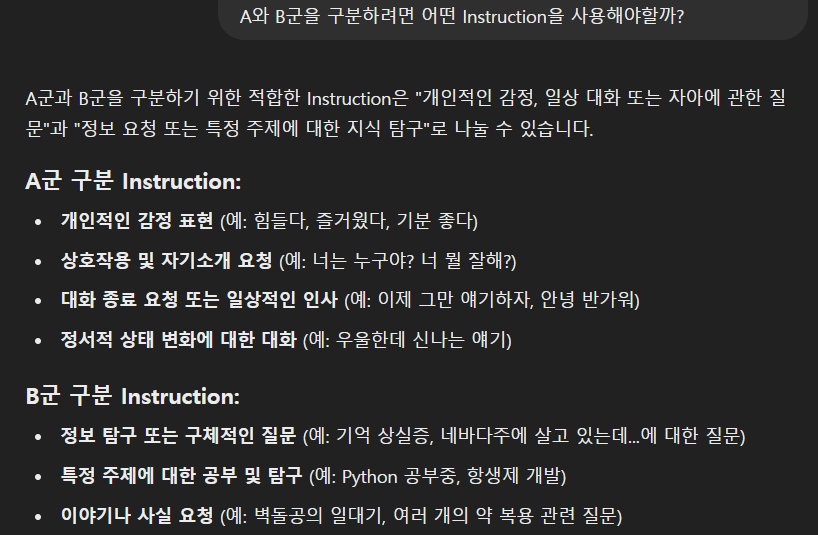

In [8]:
### 질문을 텍스트 파일로 뽑아내는 코드

data_answers = pd.read_json("/home/data/eval.jsonl", lines=True)
#display(data_answers.head())

q_txt = ""
question = []
for i in range(len(data_answers)):
    dd = data_answers.loc[i,'msg']
    dd = pd.json_normalize(dd)
    #display(dd)
    question.append(dd.loc[0,'content'])
    q_txt = q_txt + dd.loc[0,'content'] + "\n"

#display(question)
display(q_txt)

# 파일 열기 및 문자열 저장
with open("/home/questions.txt", "w", encoding="utf-8") as file:
    file.write(q_txt)


'나무의 분류에 대해 조사해 보기 위한 방법은?\n각 나라에서의 공교육 지출 현황에 대해 알려줘.\n기억 상실증 걸리면 너무 무섭겠다.\n통학 버스의 가치에 대해 말해줘.\nDmitri Ivanovsky가 누구야?\n피임을 하기 위한 방법중 약으로 처리하는 방법은 쓸만한가?\n헬륨이 다른 원소들과 반응을 잘 안하는 이유는?\n문맹 비율이 사회 발전에 미치는 영향은?\n이란 콘트라 사건이 뭐야\n자기장이 얼마나 센지 표현하는 방식은?\n피를 맑게 하고 몸 속의 노폐물을 없애는 역할을 하는 기관은?\n글리코겐의 분해는 인체에서 왜 필요한가?\n빗방울이 점점 커지게 되는 요인은?\n기체의 부피나 형태가 왜 일정하지 않을까?\n식물이 빛을 에너지로 변환하는 과정에 대해 설명해줘.\n직류와 교류 전류의 차이에 대해 알려줘.\n기름과 물이 섞여 있을 수 있나?\n인간이 2세를 생산할 때 DNA의 결합 과정에 대히 설명해줘.\n금성에서 달이 어떻게 보일까?\n차량의 연비가 좋아질때 나타나는 긍정적인 효과는?\n혼합물의 특성에 대해 알려줘.\n요새 너무 힘들다.\n세제의 거품이 만들어지는 원리는?\n나무가 생태계에서 하는 역할에 대해 설명해줘.\n전류의 흐름을 극대화 하려면 배터리와 저항을 어떻게 연결해야 하나?\n식물이 높이 자랄 수 있게 하는 메커니즘이 궁금해.\n달을 보면 항상 같은 면만 보이더라구\n식초와 베이킹 소다를 섞어주면 어떤 일이 일어나?\n세균이 나쁜줄말 알았는데 그게 아니야?\n오토마톤의 특징에 대해 알려줘.\n다양한 책을 catalog화 하는 코드에서 class 정의 방법 알려줘.\n전구가 병렬로 연결될 때 전류가 줄어드는 원인은?\n물속에서 침전이 발생하는 원리에 대해 알려줘.\n화산 폭발이 발생한 후 새로운 생물 군집이 생겨나는 것을 무엇이라 부르나?\n축전기를 병렬로 이어주면 전체 용량이 어떻게 되는가?\n정육면체가 가라앉지 않고 물 위에 떠 있을 때 수면 윗부분에 해당하는 부피를 구하는 방법은?\n니가 대답을 잘해줘서 너무 신나!\n건설 현장에서

In [3]:
### 질문을 텍스트 파일로 뽑아내는 코드

file = open("/home/question 전처리 후 일상대화 제거3 대괄호 제거.txt", "r")
question = pd.DataFrame(file)
pattern1 = r'\d+\.\s'
pattern2 = r'\n'

for i in range(len(question)):
    question.loc[i, 0] = re.sub(pattern1, '', question.loc[i, 0])
    question.loc[i, 0] = re.sub(pattern2, '', question.loc[i, 0])
    # display(question.loc[i, 0])

display(question)

,0
0,"나무,분류,조사, 나무의 분류를 조사하기 위해 어떤 방법들이 효과적인지 구체적으로 ..."
1,"공교육,지출,현황, 각 나라의 공교육에 대한 지출 현황을 구체적으로 비교하고 분석해..."
2,"기억,상실증,무서움, 기억 상실증이 발생했을 때 어떤 증상과 감정이 나타나는지 구체..."
3,"통학,버스,가치, 통학 버스가 학생과 학부모에게 제공하는 가치와 이점에 대해 구체적..."
4,"Dmitri,Ivanovsky,인물, Dmitri Ivanovsky의 생애와 업적에..."
...,...
215,"정상파,정의,특징, 정상파의 정의와 그 물리적 특징에 대해 구체적으로 설명해보세요."
216,"공,힘,운동, 공에 힘이 주어졌을 때 공의 운동 방식과 그 과학적 원리에 대해 구체..."
217,"동물,피부,생존, 동물들이 피부나 털의 색깔을 통해 생존 확률을 높이는 방식과 그 ..."
218,"메탄,산소,화학반응, 메탄과 산소의 화학 반응 과정과 그 결과에 대해 구체적으로 설..."


In [4]:
print(type(question))
question[0][1]
#display(question.loc[0,1])

<class 'pandas.core.frame.DataFrame'>


'공교육,지출,현황, 각 나라의 공교육에 대한 지출 현황을 구체적으로 비교하고 분석해보세요.'

In [5]:
with open("/home/data/eval.jsonl") as f:
    docs = [json.loads(line) for line in f]
#display(docs)

d = pd.DataFrame(docs)

q = question.copy()

for i in range(220):
    msg = '[{"role": "user", "content": "' + q.loc[i, 0] + '"}]'
    q.loc[i, 0] = msg
    
display(q)

d['msg'] = q
display(d)

d.to_json('/home/data/temp.jsonl', orient='records', lines=True, force_ascii=False)

with open('/home/data/temp.jsonl', 'r', encoding='utf-8') as infile, open('/home/data/temp3 대괄호제거.jsonl', 'w', encoding='utf-8') as outfile:
    for line in infile:
        # JSON 형식의 문자열을 파싱
        data = json.loads(line)

        # 'msg' 필드에 있는 이스케이프된 JSON 문자열을 다시 파싱하여 이스케이프 제거
        data['msg'] = json.loads(data['msg'])

        # 수정된 데이터를 다시 JSON 문자열로 변환하고 파일에 저장
        json.dump(data, outfile, ensure_ascii=False)
        outfile.write('\n')


#d2 = [json.loads(d['msg']) for line in f]
#display(d2)



,0
0,"[{""role"": ""user"", ""content"": ""나무,분류,조사, 나무의 분류..."
1,"[{""role"": ""user"", ""content"": ""공교육,지출,현황, 각 나라의..."
2,"[{""role"": ""user"", ""content"": ""기억,상실증,무서움, 기억 상..."
3,"[{""role"": ""user"", ""content"": ""통학,버스,가치, 통학 버스가..."
4,"[{""role"": ""user"", ""content"": ""Dmitri,Ivanovsky..."
...,...
215,"[{""role"": ""user"", ""content"": ""정상파,정의,특징, 정상파의 ..."
216,"[{""role"": ""user"", ""content"": ""공,힘,운동, 공에 힘이 주어..."
217,"[{""role"": ""user"", ""content"": ""동물,피부,생존, 동물들이 피..."
218,"[{""role"": ""user"", ""content"": ""메탄,산소,화학반응, 메탄과 ..."


,eval_id,msg
0,78,"[{""role"": ""user"", ""content"": ""나무,분류,조사, 나무의 분류..."
1,213,"[{""role"": ""user"", ""content"": ""공교육,지출,현황, 각 나라의..."
2,107,"[{""role"": ""user"", ""content"": ""기억,상실증,무서움, 기억 상..."
3,81,"[{""role"": ""user"", ""content"": ""통학,버스,가치, 통학 버스가..."
4,280,"[{""role"": ""user"", ""content"": ""Dmitri,Ivanovsky..."
...,...,...
215,244,"[{""role"": ""user"", ""content"": ""정상파,정의,특징, 정상파의 ..."
216,223,"[{""role"": ""user"", ""content"": ""공,힘,운동, 공에 힘이 주어..."
217,303,"[{""role"": ""user"", ""content"": ""동물,피부,생존, 동물들이 피..."
218,286,"[{""role"": ""user"", ""content"": ""메탄,산소,화학반응, 메탄과 ..."


### 결과 파일 읽어와서 스코어 확인

In [59]:







data_answers = pd.read_json("eval.json", lines=True)
data_answers = pd.DataFrame(data_answers)


pd_answers = []

for i in range(10):
    tmp = str(data_answers[0][i])
    spe_tmp = tmp.split(", \"")
    print(spe_tmp)
    pd_answers.append(spe_tmp)

pd_answers = pd.DataFrame(pd_answers)

pd_answers
#for i in range(10):
    #print(pd_answers[1][i])




FileNotFoundError: File eval.json does not exist

In [3]:


doc = pd.read_json("data/documents.jsonl")




ValueError: Trailing data

질의 응답 쿼리 내용 확인

In [52]:
output_file = "/home/02-1 질문쿼리번경GPT없음2.csv"

data_answers = pd.read_json(output_file, lines=True)
#display(data_answers)
for i in range(len(data_answers)) :
    prt = []
    #print(data_answers.loc[i, 'references'])
    jd = pd.json_normalize(data_answers.loc[i, 'references'])
    jd = pd.DataFrame(jd)
    tmp = (data_answers.loc[i, 'standalone_query'])
    tmp = tmp.replace("\n", "")
    print(tmp)
    print(jd.loc[0, 'score'], ":", jd.loc[0, 'content'].replace("\n", ""))
    print(jd.loc[1, 'score'], ":", jd.loc[1, 'content'].replace("\n", ""))
    print(jd.loc[2, 'score'], ":", jd.loc[2, 'content'].replace("\n", ""))
    print("\n")
    #display(prt)
    
display(data_answers)


나무의 분류에 대해 조사하기 위해서는 식물학과 생물학적인 지식이 필요합니다. 또한, 다음과 같은 방법을 활용하여 조사할 수 있습니다.분야: 생물학, 식물학분류: 나무의 분류 방법, 분류 체계핵심주제: 분류 체계, 분류학, 식물 분류, 분류 기준핵심 키워드:1. 식물 분류학2. 나무 분류3. 분류 체계4. 분류 기준5. 분류학적 방법6. 분류학적 특징7. 식물 분류 기준8. 나무 분류법9. 분류학적 분석10. 식물 분류체계이러한 키워드를 활용하여 학술 논문, 전문 서적, 학술지 등에서 신뢰할 만한 정보를 얻을 수 있습니다.
204.88443 : 한 학생이 다양한 종류의 나무를 조사하고 있습니다. 이 학생은 성장 속도, 온도 범위, 크기가 비슷한 두 나무를 발견했습니다. 그러나 이 두 나무의 잎과 꽃은 서로 다릅니다. 이러한 특징을 고려하면, 이 나무들은 대체로 같은 속에 속해 있을 것으로 추측됩니다. 같은 속에 속한 나무들은 종류별로 유사한 특징을 가지고 있으며, 이는 생물 분류학에서 중요한 기준 중 하나입니다. 따라서 이 학생의 조사 결과는 나무의 분류와 관련된 중요한 정보를 제공할 수 있습니다. 이러한 조사는 나무의 성장과 생태에 대한 이해를 높이는 데 도움이 될 것입니다.
197.53938 : 생물학에서 일부 생물체의 분류 방법이 변경되었습니다. 이제 생물체를 재분류하는 데에는 구조보다는 분자 수준에서의 조사가 사용됩니다. 이 새로운 방법은 생물체의 유전자나 단백질의 구조와 기능을 분석하여 그들의 진화적 관계를 밝히는 데에 큰 도움이 됩니다. 이러한 분자 수준의 조사는 생물체의 유전적 유사성을 파악하고, 서로 다른 종 간의 진화적 연결고리를 찾는 데에 중요한 역할을 합니다. 이 방법은 생물체의 분류를 더욱 정확하고 명확하게 만들어주며, 생물 다양성 연구에도 큰 기여를 하고 있습니다. 이제 구조보다는 분자 수준에서의 조사가 생물체의 재분류에 사용되고 있으며, 이는 생물학의 발전에 새로운 지평을 열어주고 있습니다.
182.98717 : 과학적으로 채소를 분류하

NotImplementedError: 